<h1 align=center style="line-height:300%;font-family:vazir;color:#0099cc">
<font face="vazir" color="#0099cc">
پروژه دوم درس داده کاوی
</font>
</h1>
<h3 align=center style="line-height:100%;font-family:vazir;color:#0099cc">
استاد درس: دکتر ناظرفرد
</h3>
<h5 align=center style="font-size: 20px;line-height:100%;font-family:vazir;color:#0099cc">
طراح تمرین عملی: فرهاد امان  
    </h5>

## Importing Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet
from sklearn.metrics import mean_squared_error, r2_score
from xgboost import XGBRegressor

## Loading Data to Pandas DataFrame

In [2]:
df = pd.read_csv("real-estate.csv")

## Droping Unnecessary Columns

In [3]:
df = df.drop(columns=["No", "X1 transaction date"])

## Splitting Data to Train and Test

In [4]:
x = df.drop(columns=["Y house price of unit area"])
y = df["Y house price of unit area"]

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

## Visualizing Data Distribution and Correlation

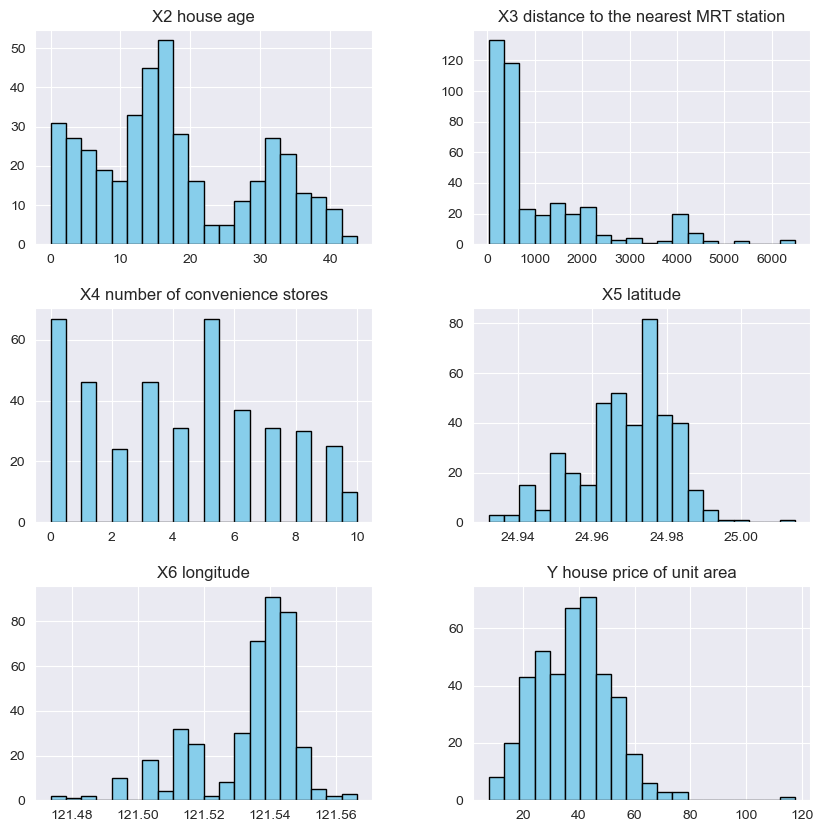

In [5]:
# Histogram
df.hist(bins=20, figsize=(10, 10), color="skyblue", edgecolor="black")
plt.grid(True)
plt.show()

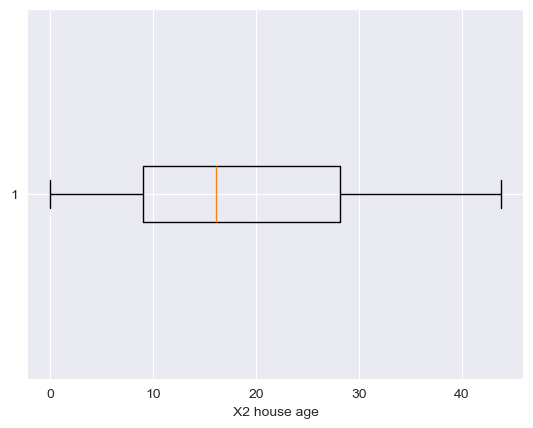

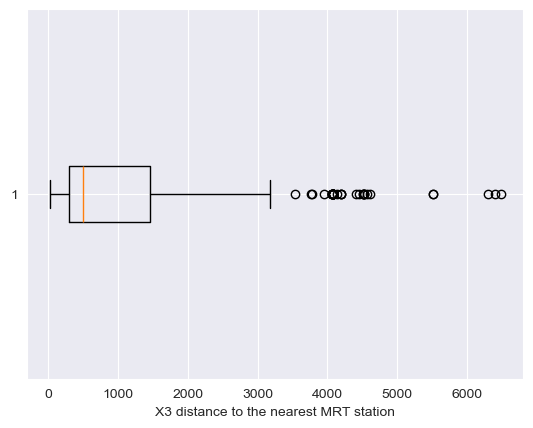

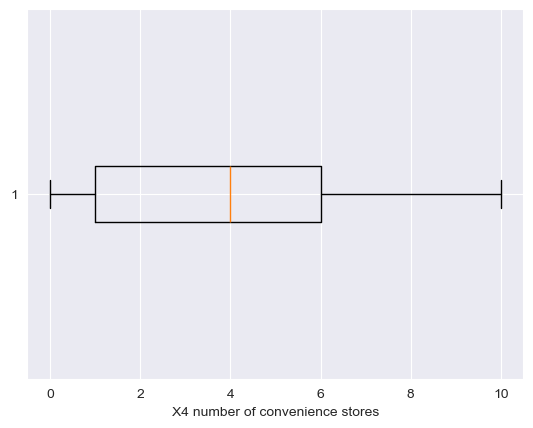

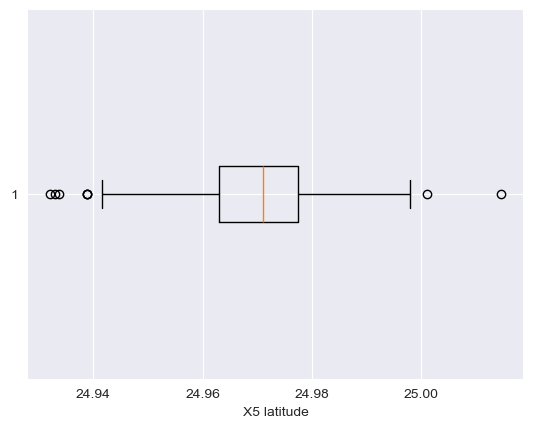

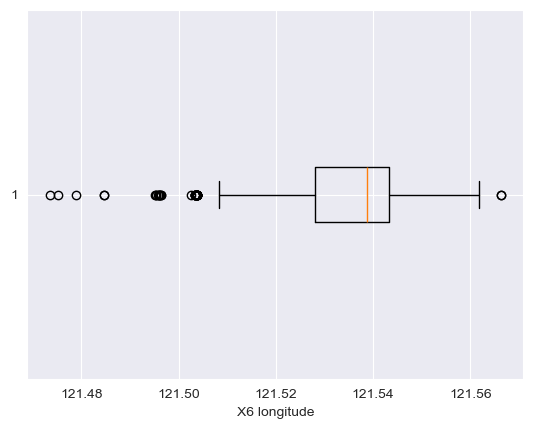

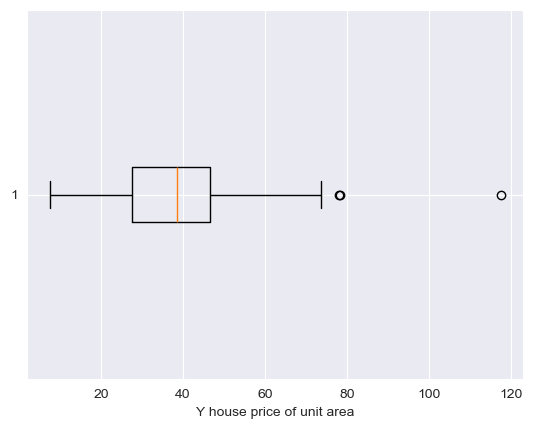

In [6]:
# Boxplot
for column in df.columns:
    plt.boxplot(df[column], vert=False)
    plt.xlabel(column)
    plt.grid(True)
    plt.show()

D:\Drive_D\Programs\Anaconda\envs\DataScience_ML\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
D:\Drive_D\Programs\Anaconda\envs\DataScience_ML\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
D:\Drive_D\Programs\Anaconda\envs\DataScience_ML\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
D:\Drive_D\Programs\Anaconda\envs\DataScience_ML\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option i

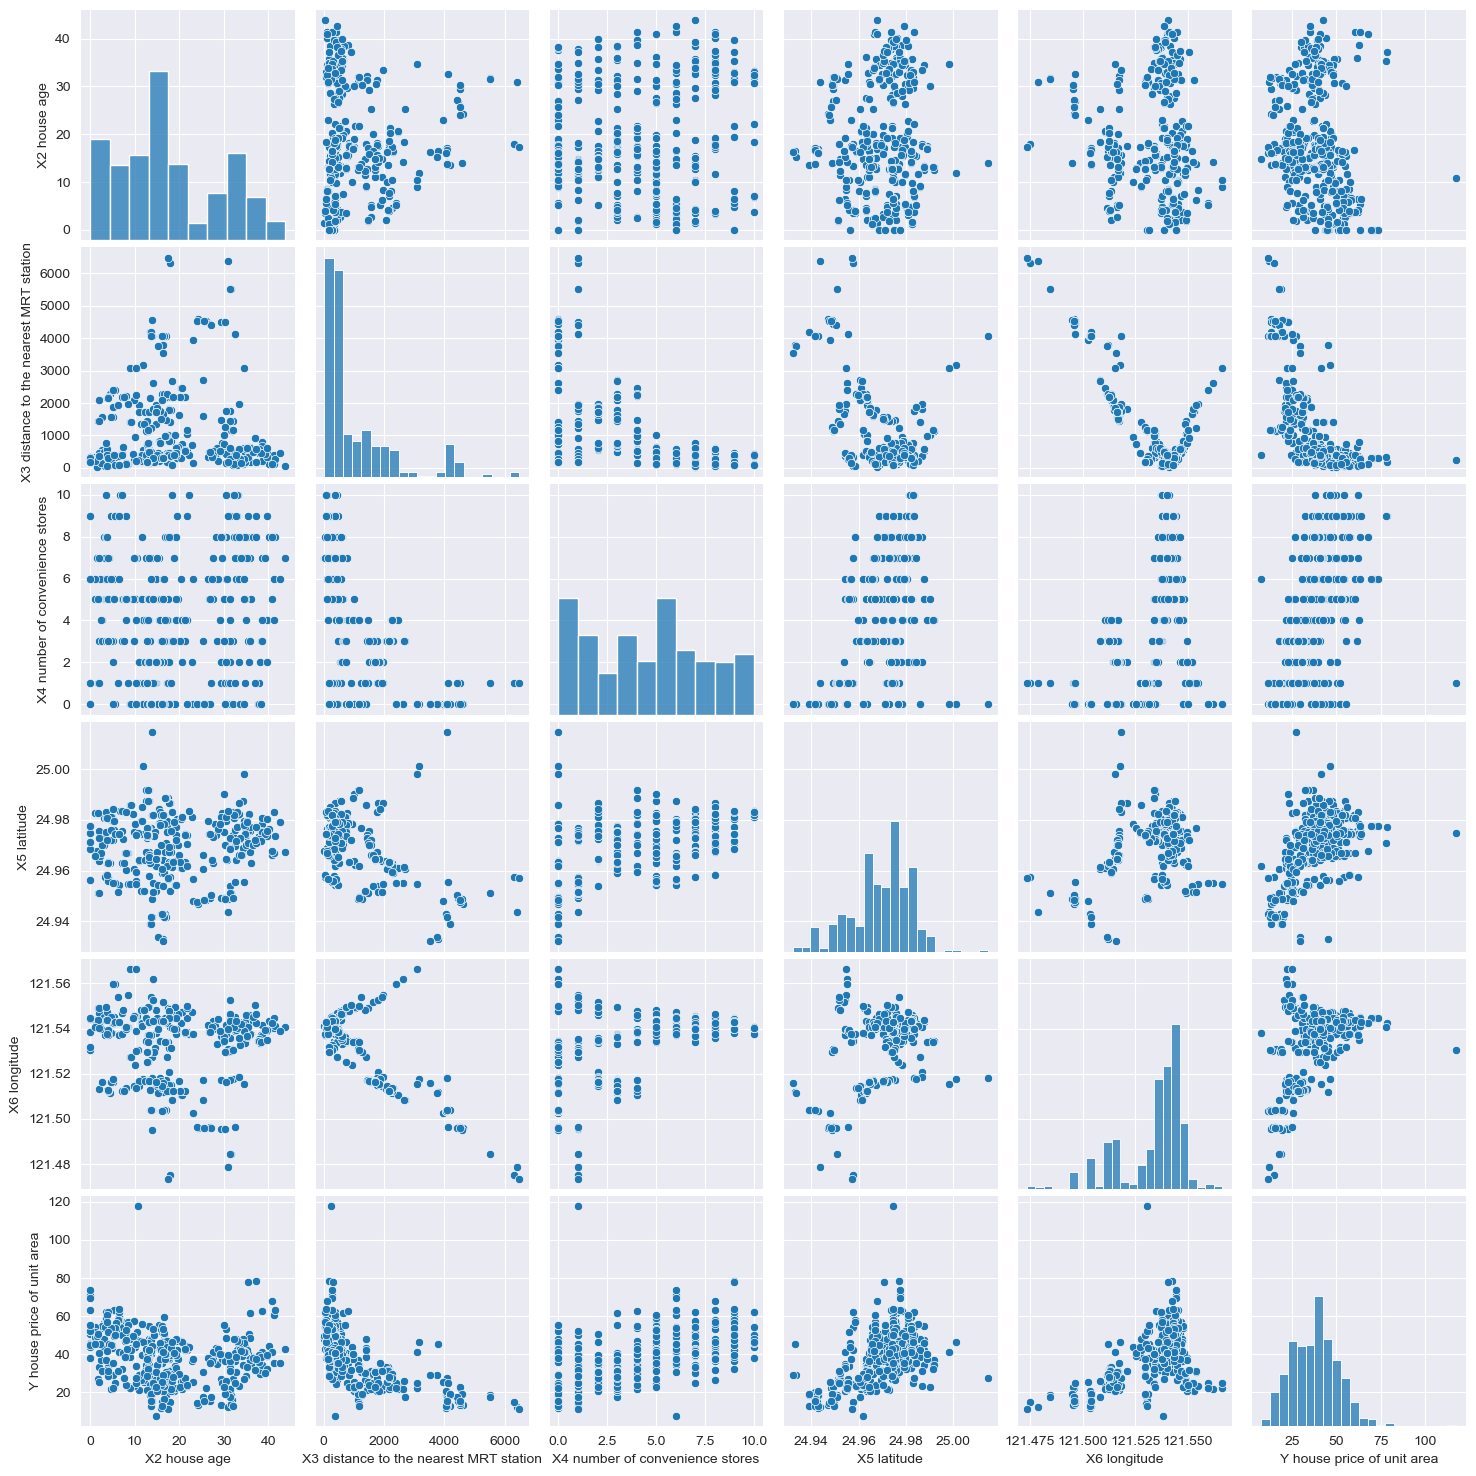

In [7]:
# Pairplots
# Plotting distributions of features
sns.pairplot(df)
plt.show()

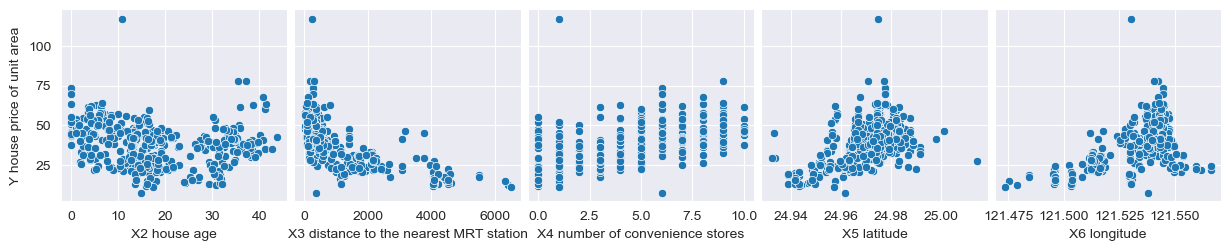

In [8]:
# Pairplots
# Plotting distributions of features
sns.pairplot(data=df, y_vars=['Y house price of unit area'], x_vars=x)
plt.show()

                                        X2 house age  \
X2 house age                                1.000000   
X3 distance to the nearest MRT station      0.025622   
X4 number of convenience stores             0.049593   
X5 latitude                                 0.054420   
X6 longitude                               -0.048520   
Y house price of unit area                 -0.210567   

                                        X3 distance to the nearest MRT station  \
X2 house age                                                          0.025622   
X3 distance to the nearest MRT station                                1.000000   
X4 number of convenience stores                                      -0.602519   
X5 latitude                                                          -0.591067   
X6 longitude                                                         -0.806317   
Y house price of unit area                                           -0.673613   

                                

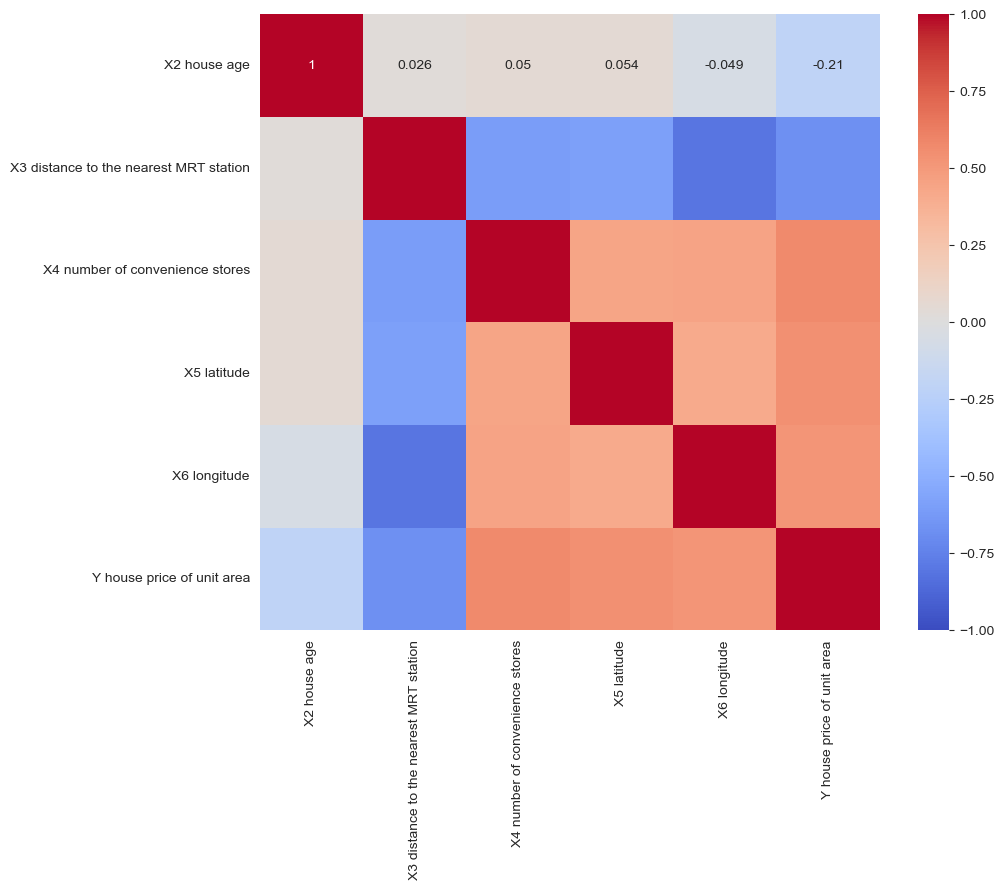

In [9]:
corr_matrix = df.corr()

print(corr_matrix)

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.show()

In [10]:
# Defining an evaluation function
def evaluate(test, pred, model_name: str):
    mse = mean_squared_error(test, pred)
    r2 = r2_score(test, pred)
    
    print(f"{model_name} Mean squared error: {mse}")
    print(f"{model_name} R2 score: {r2}")

## Linear Regression

In [11]:
# Creating and training the model
linear_model = LinearRegression()

linear_model.fit(x_train, y_train)

LinearRegression()

In [12]:
# Make predictions on the test set
y_pred = linear_model.predict(x_test)

In [13]:
# Evaluating model
evaluate(y_test, y_pred, model_name="Linear Regression")

Linear Regression Mean squared error: 54.58094520086133
Linear Regression R2 score: 0.6746481382828223


## Polynomial Regression

In [14]:
degree = 2

poly = PolynomialFeatures(degree=degree)

# Transforming features. our model is polynomial due to inputs (x); so we only need to transform x.
# there is no need to transform y
# example: y = ax^2 + bx + c 
x_train_poly = poly.fit_transform(x_train)
x_test_poly = poly.fit_transform(x_test)

In [15]:
poly_model = LinearRegression()

# Training
poly_model.fit(x_train_poly, y_train)

LinearRegression()

In [16]:
# Prediction
y_pred = poly_model.predict(x_test_poly)

In [17]:
# Evaluation
evaluate(y_test, y_pred, model_name="Polynomial(Quadratic) Regression")

Polynomial(Quadratic) Regression Mean squared error: 41.850483445036076
Polynomial(Quadratic) Regression R2 score: 0.7505332190108072


## Ridge Regression

In [18]:
alpha = 1.0  # The alpha parameter in Ridge Regression is a regularization parameter that controls the strength of the L2 regularization term.
ridge_model = Ridge(alpha=alpha)

#Training
ridge_model.fit(x_train, y_train)

Ridge()

In [19]:
# Prediction
y_pred = ridge_model.predict(x_test)

In [20]:
# Evaluation
evaluate(y_test, y_pred, model_name="Ridge Regression")

Ridge Regression Mean squared error: 58.60171856593545
Ridge Regression R2 score: 0.6506806878281706


## Lasso Regression

In [21]:
alpha = 1.0
lasso_model = Lasso(alpha=alpha)

# Training
lasso_model.fit(x_train, y_train)

Lasso()

In [22]:
# Prediction
y_pred = lasso_model.predict(x_test)

In [23]:
# evaluation
evaluate(y_test, y_pred, model_name="Lasso Regression")

Lasso Regression Mean squared error: 59.5596241402479
Lasso Regression R2 score: 0.6449707031292082


## Elastic Net Regression

In [24]:
# Elastic Net Regression is a linear regression model that combines the penalties of both L1 (Lasso) and L2 (Ridge) regularization. This can be particularly useful when there are multiple features that are correlated with one another. The Elastic Net model aims to inherit the best properties of both Ridge and Lasso.
alpha = 1.0 # regularization strength
l1_ratio = 0.5  # mix ratio between Lasso and Ridge
elastic_model = ElasticNet(alpha=alpha, l1_ratio=l1_ratio)

# Training
elastic_model.fit(x_train, y_train)

ElasticNet()

In [25]:
# Prediction
y_pred = elastic_model.predict(x_test)

In [26]:
# Evaluation
evaluate(y_test, y_pred, model_name="Elastic Net Regression")

Elastic Net Regression Mean squared error: 59.597221320868165
Elastic Net Regression R2 score: 0.6447465898848315


## XGBoost Regression 

In [27]:
# XGBoost is a powerful and efficient implementation of gradient boosting for decision trees.
xgb_model = XGBRegressor(objective='reg:squarederror', n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)

xgb_model.fit(x_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=3, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=100, n_jobs=None,
             num_parallel_tree=None, random_state=42, ...)

In [28]:
# Prediction
y_pred = xgb_model.predict(x_test)

In [29]:
# Evaluation
evaluate(y_test, y_pred, model_name="XGB Regression")

XGB Regression Mean squared error: 32.36003577160368
XGB Regression R2 score: 0.8071048816618959


# Assosiation Rules

### Import Libraries

In [30]:
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori, association_rules

### Data Loading

In [31]:
data = pd.read_csv('grocery.csv', header=None, names=['transactions'])

### Preprocess Data

In [32]:
data['transactions'] = data['transactions'].str.split(',')
transactions = data['transactions'].tolist() # Convert the dataset into a list of transactions

### Apply TransactionEncoder

In [33]:
trans_encoder = TransactionEncoder()

# Transform the transactions into a one-hot encoded array
trans_encoder_arr = trans_encoder.fit_transform(transactions)

# Convert the array into a DataFrame
df_encoded = pd.DataFrame(trans_encoder_arr, columns=trans_encoder.columns_)

print(df_encoded.head())

   BISCUIT  BOURNVITA  BREAD   COCK  COFFEE  CORNFLAKES    JAM  MAGGI   MILK  \
0     True      False   True  False   False       False  False  False   True   
1     True      False   True  False   False        True  False  False   True   
2    False       True   True  False   False       False  False  False  False   
3    False      False   True  False   False       False   True   True   True   
4     True      False  False  False   False       False  False   True  False   

   SUGER    TEA  
0  False  False  
1  False  False  
2  False   True  
3  False  False  
4  False   True  


### Generate Frequent Itemsets

In [34]:
minsup = 0.2
frequent_itemsets = apriori(df_encoded, min_support=minsup, use_colnames=True)

print(frequent_itemsets)

    support              itemsets
0      0.35             (BISCUIT)
1      0.20           (BOURNVITA)
2      0.65               (BREAD)
3      0.40              (COFFEE)
4      0.30          (CORNFLAKES)
5      0.25               (MAGGI)
6      0.25                (MILK)
7      0.30               (SUGER)
8      0.35                 (TEA)
9      0.20      (BISCUIT, BREAD)
10     0.20         (BREAD, MILK)
11     0.20        (BREAD, SUGER)
12     0.20          (TEA, BREAD)
13     0.20  (CORNFLAKES, COFFEE)
14     0.20       (SUGER, COFFEE)
15     0.20          (TEA, MAGGI)


### Generate Association Rules

In [35]:
minconf = 0.4
rules = association_rules(frequent_itemsets, metric='confidence', min_threshold=minconf)

print(rules)

    antecedents   consequents  antecedent support  consequent support  \
0     (BISCUIT)       (BREAD)                0.35                0.65   
1        (MILK)       (BREAD)                0.25                0.65   
2       (SUGER)       (BREAD)                0.30                0.65   
3         (TEA)       (BREAD)                0.35                0.65   
4  (CORNFLAKES)      (COFFEE)                0.30                0.40   
5      (COFFEE)  (CORNFLAKES)                0.40                0.30   
6       (SUGER)      (COFFEE)                0.30                0.40   
7      (COFFEE)       (SUGER)                0.40                0.30   
8         (TEA)       (MAGGI)                0.35                0.25   
9       (MAGGI)         (TEA)                0.25                0.35   

   support  confidence      lift  leverage  conviction  zhangs_metric  
0      0.2    0.571429  0.879121   -0.0275    0.816667      -0.174603  
1      0.2    0.800000  1.230769    0.0375    1.7500

### Display Rules

In [36]:
print(rules[['antecedents', 'consequents', 'support', 'confidence']])
print("Sorted by confidence:")
print(rules.sort_values(by='confidence', ascending=False)[['antecedents', 'consequents', 'support', 'confidence']])

    antecedents   consequents  support  confidence
0     (BISCUIT)       (BREAD)      0.2    0.571429
1        (MILK)       (BREAD)      0.2    0.800000
2       (SUGER)       (BREAD)      0.2    0.666667
3         (TEA)       (BREAD)      0.2    0.571429
4  (CORNFLAKES)      (COFFEE)      0.2    0.666667
5      (COFFEE)  (CORNFLAKES)      0.2    0.500000
6       (SUGER)      (COFFEE)      0.2    0.666667
7      (COFFEE)       (SUGER)      0.2    0.500000
8         (TEA)       (MAGGI)      0.2    0.571429
9       (MAGGI)         (TEA)      0.2    0.800000
Sorted by confidence:
    antecedents   consequents  support  confidence
1        (MILK)       (BREAD)      0.2    0.800000
9       (MAGGI)         (TEA)      0.2    0.800000
2       (SUGER)       (BREAD)      0.2    0.666667
4  (CORNFLAKES)      (COFFEE)      0.2    0.666667
6       (SUGER)      (COFFEE)      0.2    0.666667
0     (BISCUIT)       (BREAD)      0.2    0.571429
3         (TEA)       (BREAD)      0.2    0.571429
8        